# Importing the necessary library for the Model

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score,mean_absolute_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

from sklearn.feature_selection import RFE

# (a) When and by whom was the dataset created?

The dataset does not explicitly state the creator or the date of creation. However, it is likely collected by environmental agencies, meteorological organizations, or research institutions studying flood risks and mitigation.

# (b) How did you access the dataset?

The dataset has been provided for analysis, but specific details on how it was obtained (e.g., from government records, research institutions, or an open data source) are not mentioned.

# (c) How does it align with the chosen UNSDG?

This dataset aligns with UN Sustainable Development Goal (UNSDG) 13: Climate Action.
It provides insights into flood risk factors, helping communities, policymakers, and environmental agencies improve flood preparedness and resilience.
By analyzing this dataset, stakeholders can develop more effective flood management strategies, reducing loss of life and property due to climate-related disasters.

# (d) List of Attributes (Columns) in the Dataset
MonsoonIntensity – Intensity of monsoon rainfall (numerical).

TopographyDrainage – Effectiveness of natural drainage based on topography (numerical).

RiverManagement – Quality of river management practices (numerical).

Deforestation – Measure of deforestation in the region (numerical).

Urbanization – Level of urban development (numerical).

ClimateChange – Impact of climate change factors (numerical).

DamsQuality – Condition and effectiveness of dam infrastructure (numerical).

Siltation – Level of silt accumulation in water bodies (numerical).

AgriculturalPractices – Influence of farming practices on flooding (numerical).

Encroachments – Presence of illegal constructions on flood-prone areas (numerical).

IneffectiveDisasterPreparedness – Level of disaster preparedness in the region (numerical).

DrainageSystems – Effectiveness of artificial drainage infrastructure (numerical).

CoastalVulnerability – Susceptibility of coastal areas to flooding (numerical).

Landslides – Frequency and impact of landslides in the area (numerical).

Watersheds – Condition and management of watershed areas (numerical).

DeterioratingInfrastructure – Effect of aging infrastructure on flood risks (numerical).

PopulationScore – Population density and distribution (numerical).

WetlandLoss – Decrease in wetland areas affecting water absorption (numerical).

InadequatePlanning – Effect of poor urban and environmental planning (numerical).

PoliticalFactors – Influence of policy and governance on flood control (numerical).

FloodProbability – The likelihood of flooding occurring (target variable, numerical).

# Potential Questions the Dataset Could Help AnswerWhat are the most significant factors influencing flood probability?
How does urbanization affect flood risks?

Is there a correlation between deforestation and increased flood probability?

How do climate change and wetland loss contribute to flooding?

Which areas are most vulnerable to flooding based on available data?

# Lodaded the Dataset For the model

In [9]:
data = pd.read_csv('/content/drive/MyDrive/Course Work Dataset/flood.csv')
df = pd.DataFrame(data)
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


# Getting all the information from the dataset for more insight to build model

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [11]:
df.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,4.991480,4.984100,5.01594,5.008480,4.989060,4.988340,5.01536,4.988600,5.006120,5.006380,...,5.006060,4.999920,4.984220,4.97982,4.988200,4.984980,5.00512,4.994360,4.990520,0.499660
std,2.236834,2.246488,2.23131,2.222743,2.243159,2.226761,2.24500,2.232642,2.234588,2.241633,...,2.238107,2.247101,2.227741,2.23219,2.231134,2.238279,2.23176,2.230011,2.246075,0.050034
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.285000
25%,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000,0.465000
50%,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,0.500000
75%,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.00000,6.000000,6.000000,0.535000
max,16.000000,18.000000,16.00000,17.000000,17.000000,17.000000,16.00000,16.000000,16.000000,18.000000,...,17.000000,17.000000,16.000000,16.00000,17.000000,19.000000,22.00000,16.000000,16.000000,0.725000


In [12]:
df.isnull().sum()

,0
MonsoonIntensity,0
TopographyDrainage,0
RiverManagement,0
Deforestation,0
Urbanization,0
ClimateChange,0
DamsQuality,0
Siltation,0
AgriculturalPractices,0
Encroachments,0


In [13]:
# Checking the column names to ensure they exist
print("Columns in data:", df.columns)

Columns in data: Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')


# Exploratory Data Analysis Statistical Interpretation and Visualizations.:

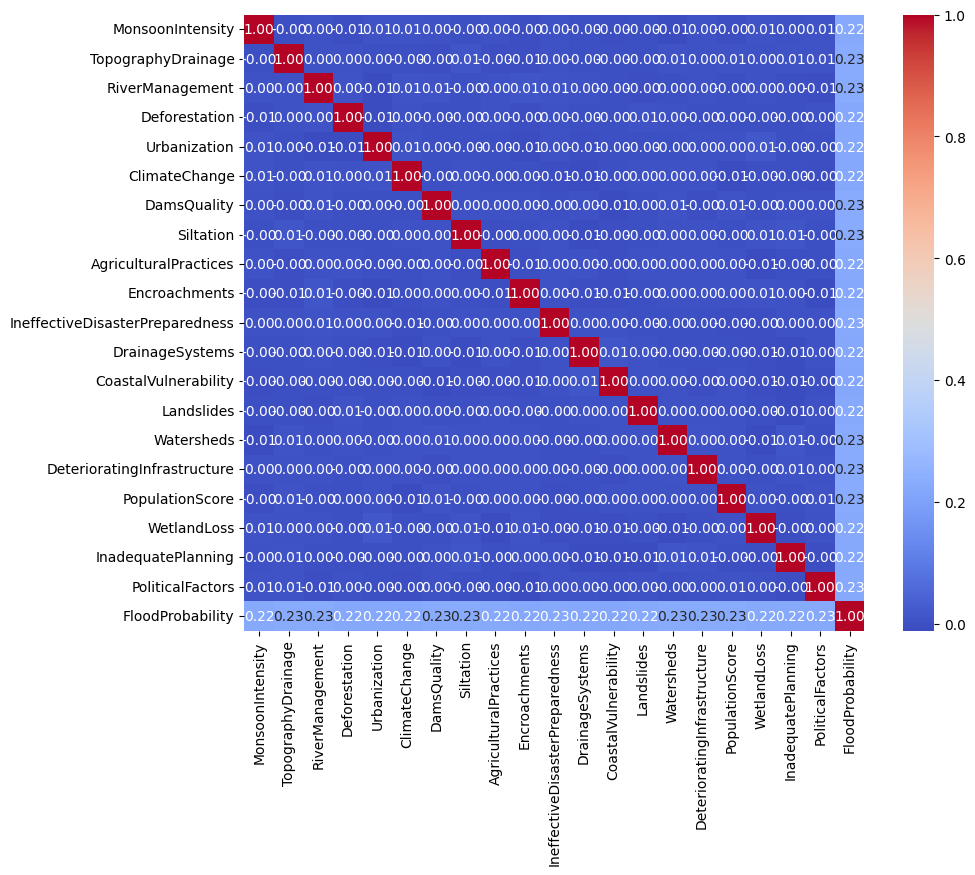

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the features and target variable
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.show()


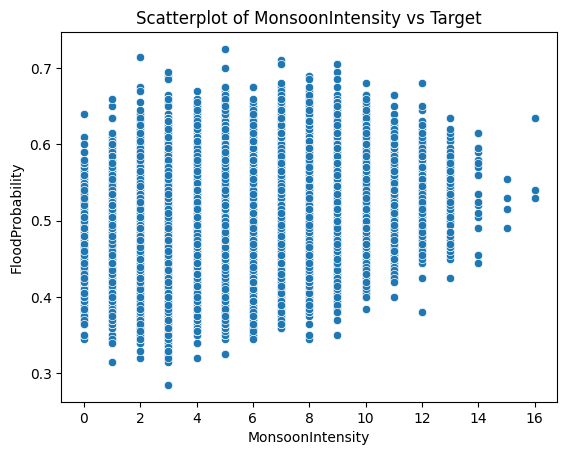

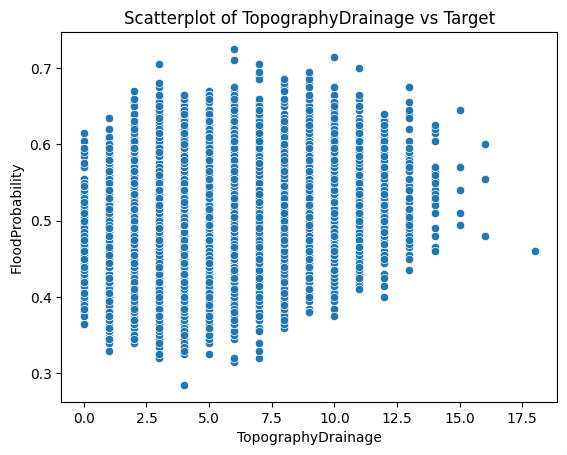

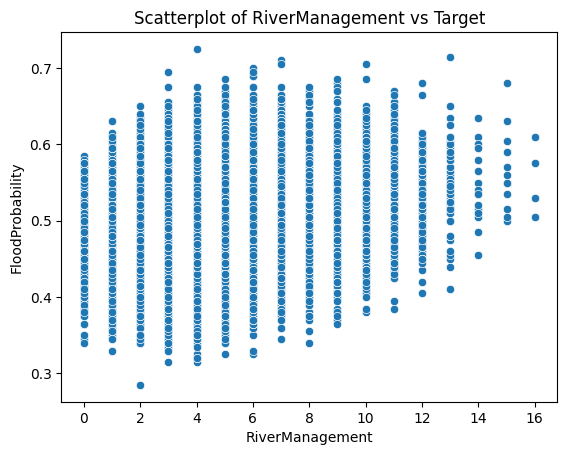

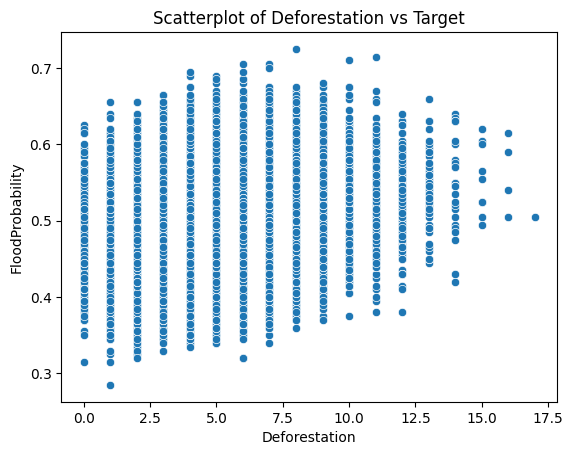

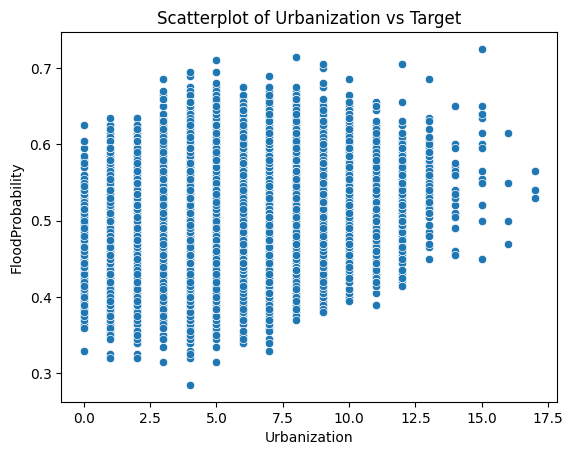

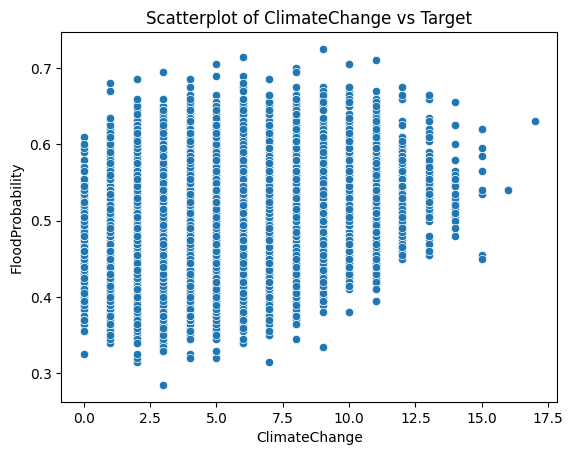

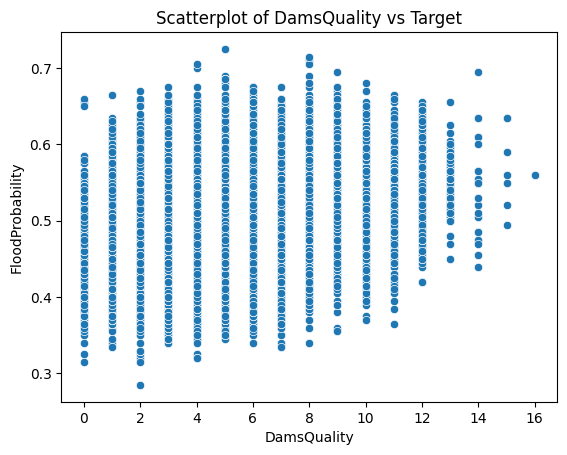

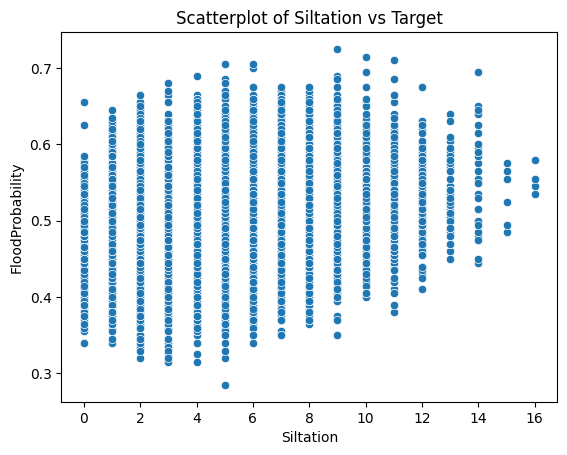

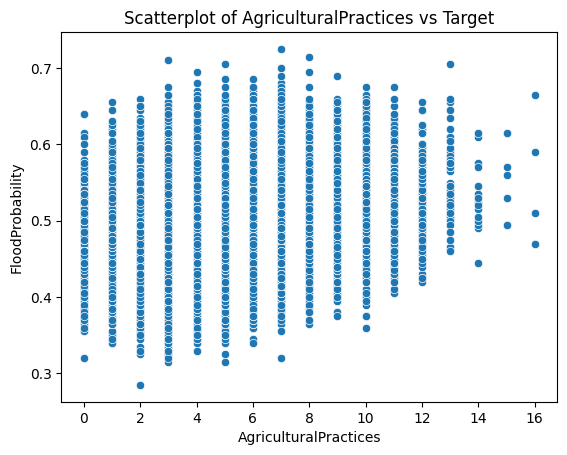

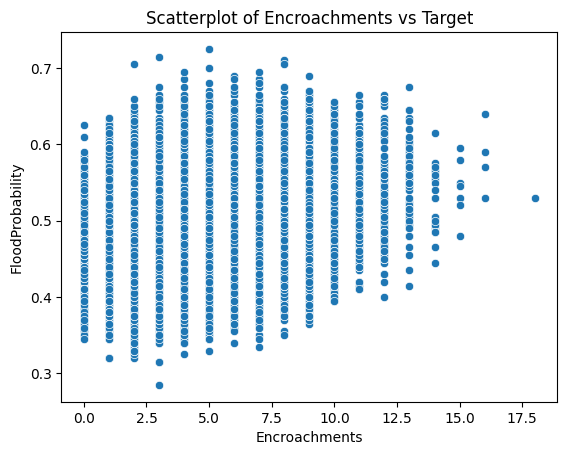

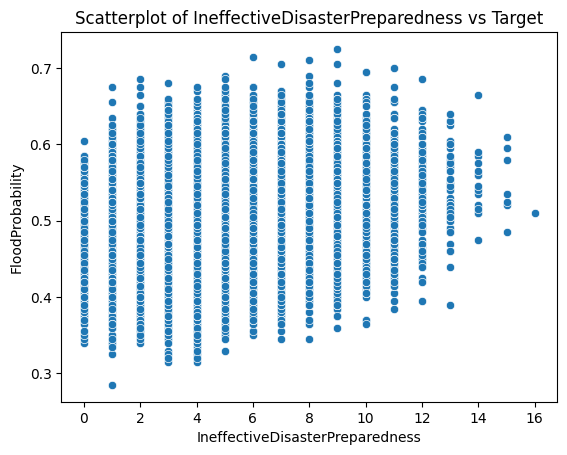

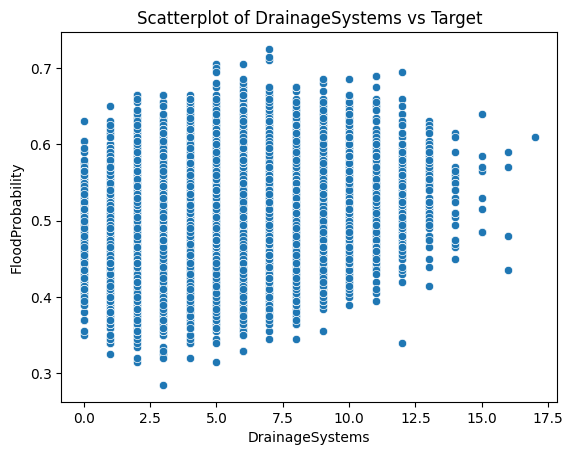

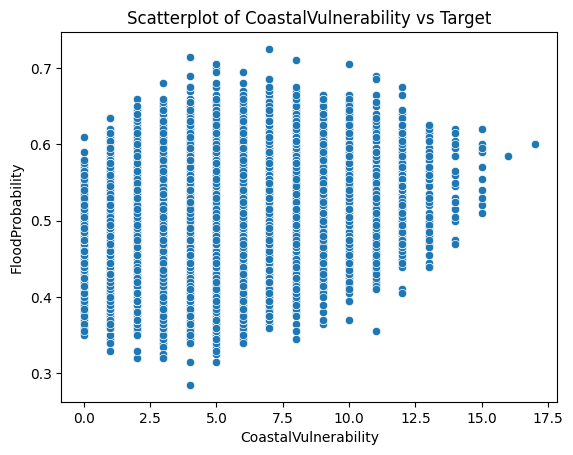

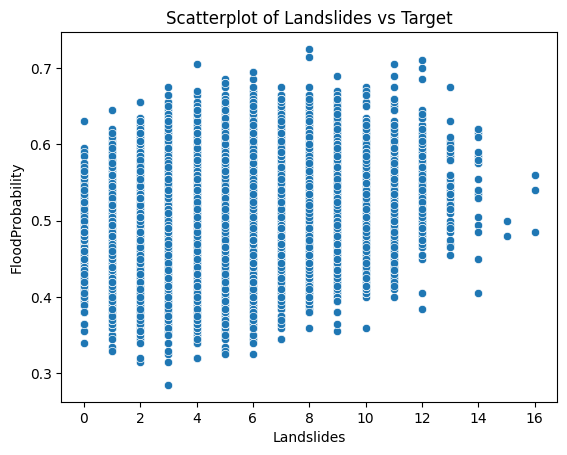

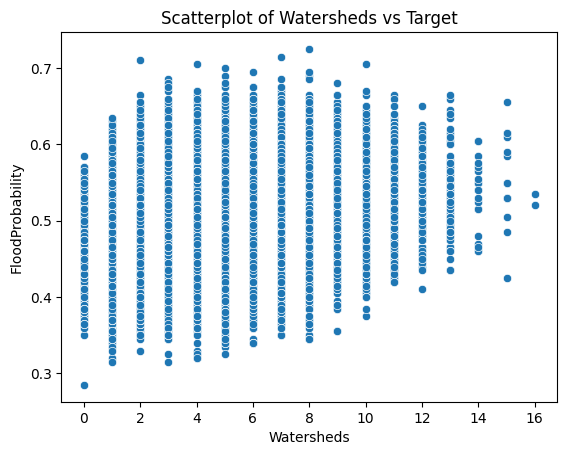

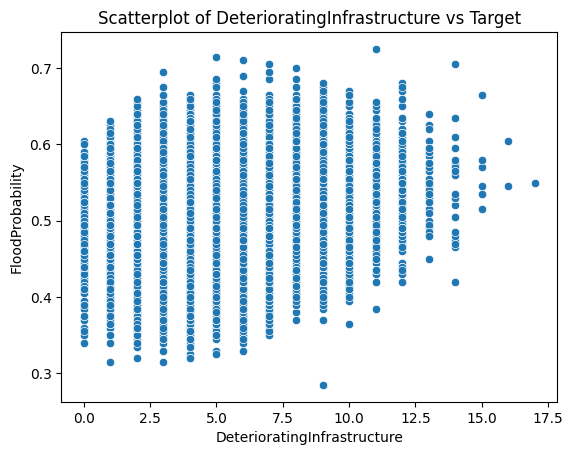

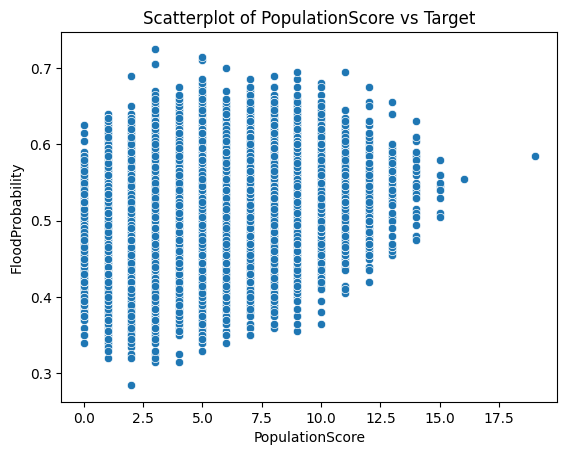

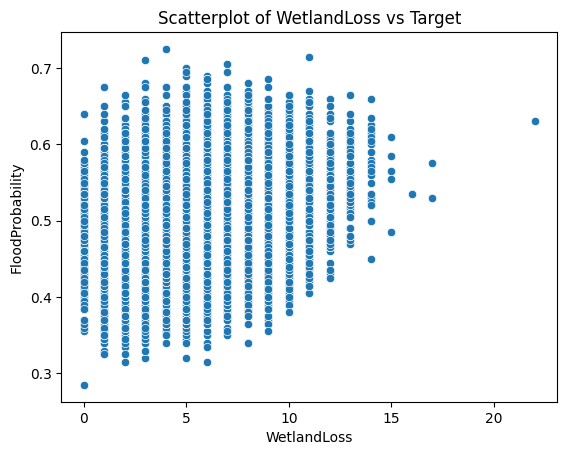

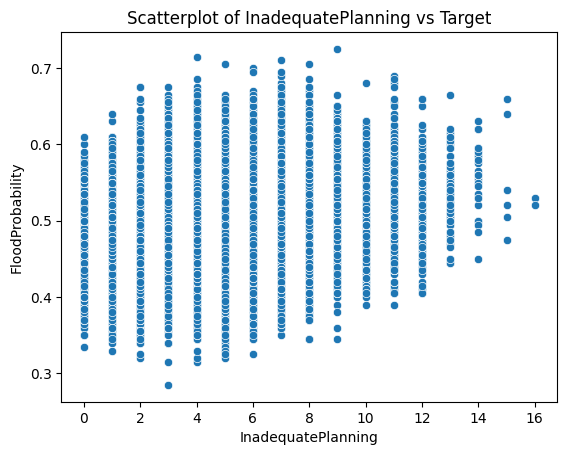

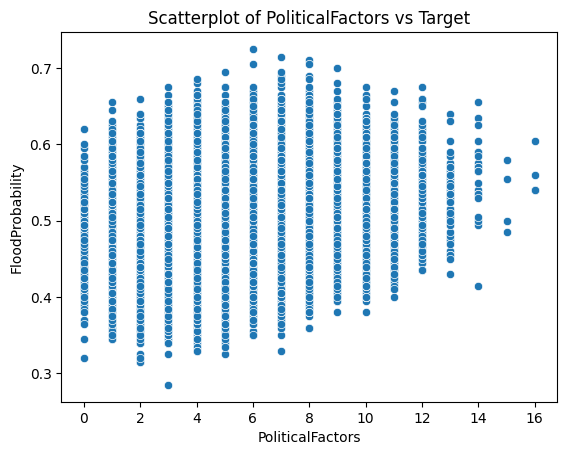

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
features = df.drop('FloodProbability', axis=1)

# Create a scatterplot for each feature vs target
for feature in features:
    sns.scatterplot(data=df, x=feature, y='FloodProbability')
    plt.title(f'Scatterplot of {feature} vs Target')
    plt.show()


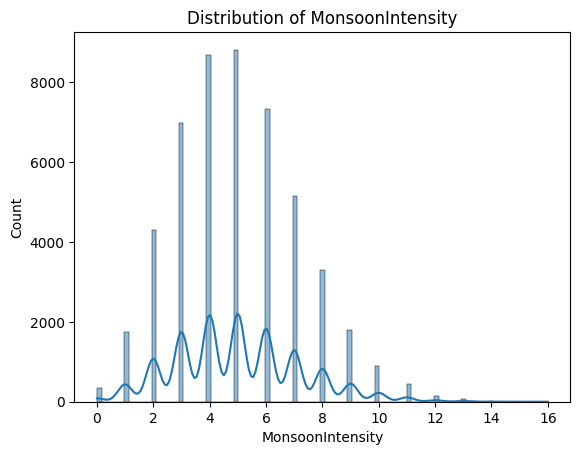

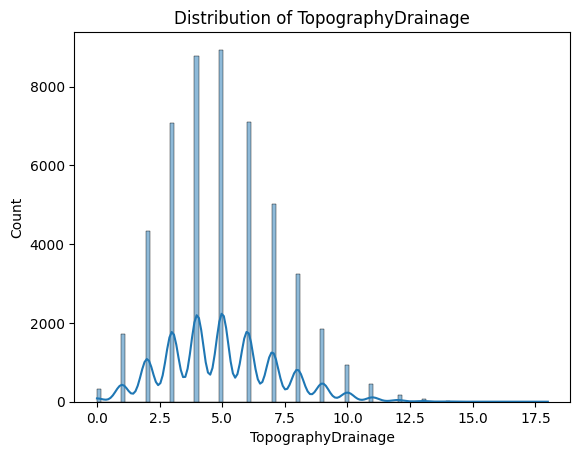

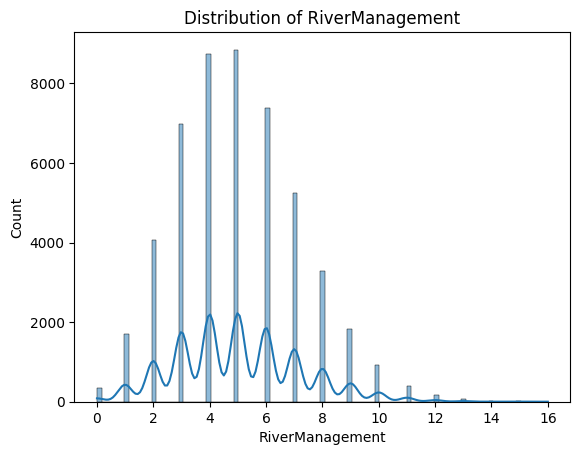

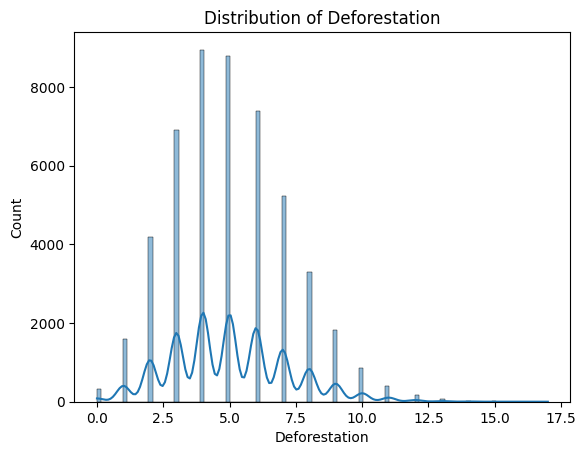

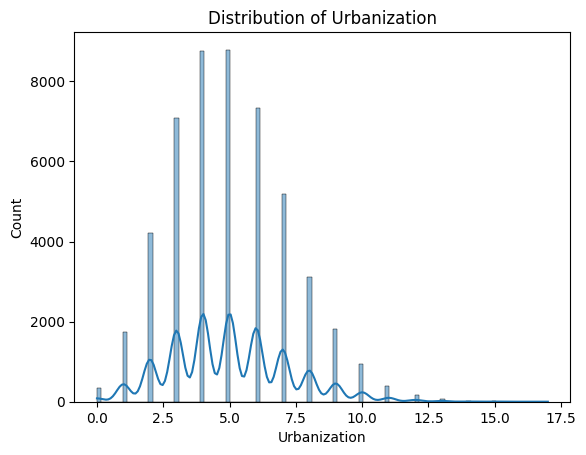

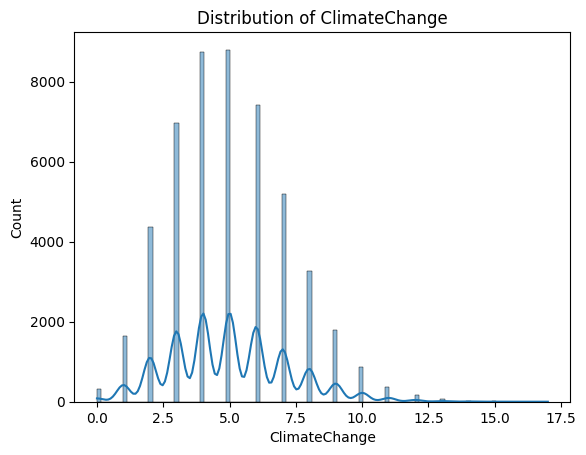

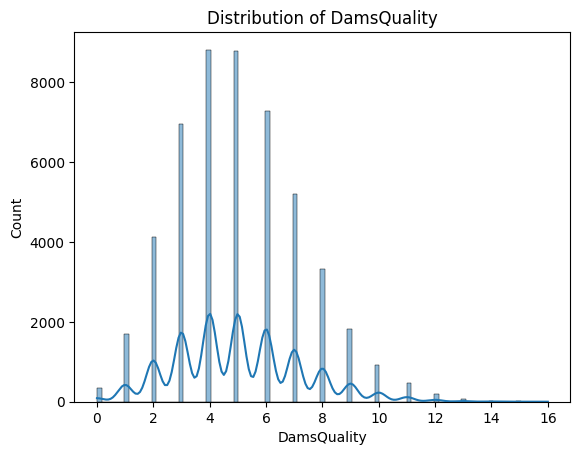

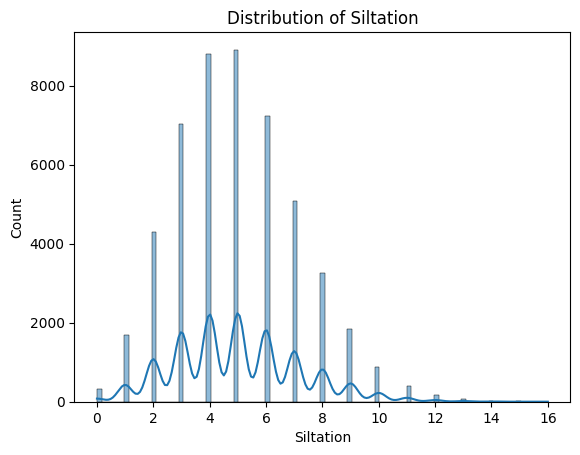

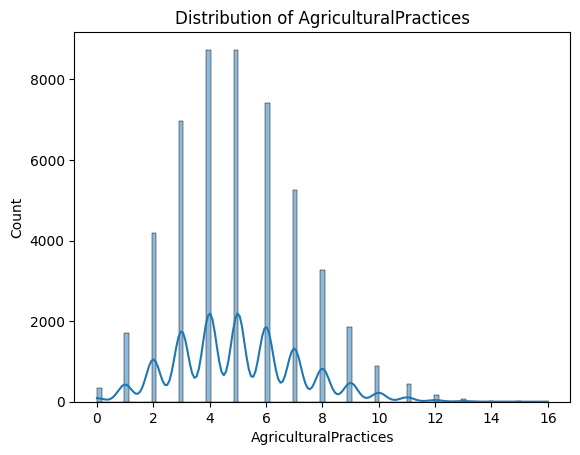

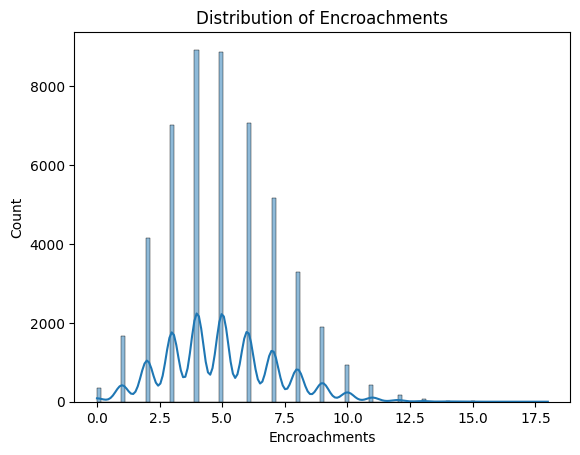

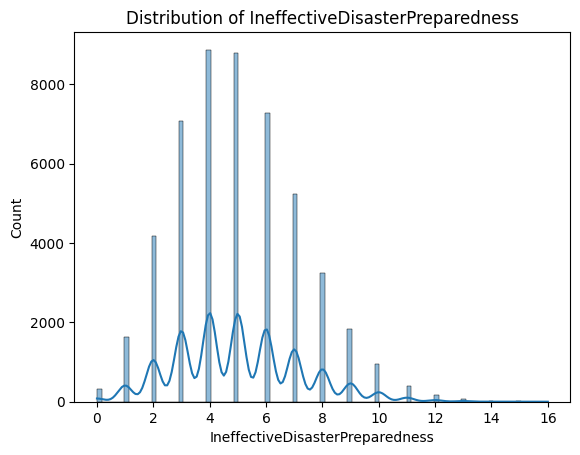

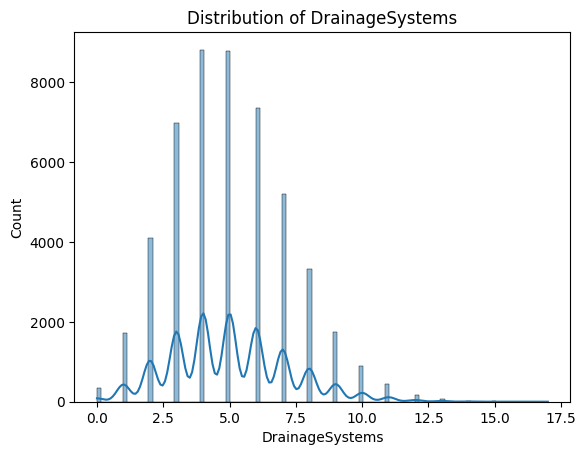

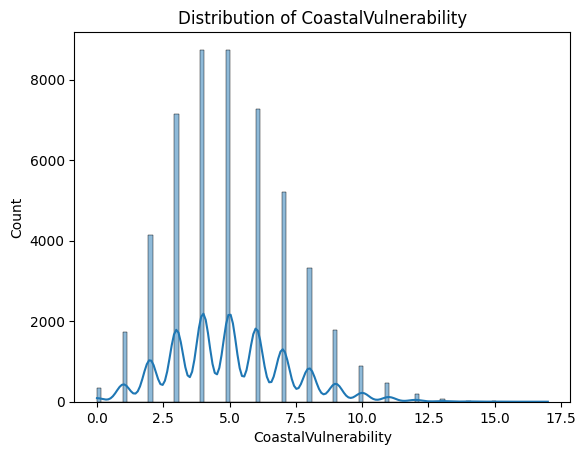

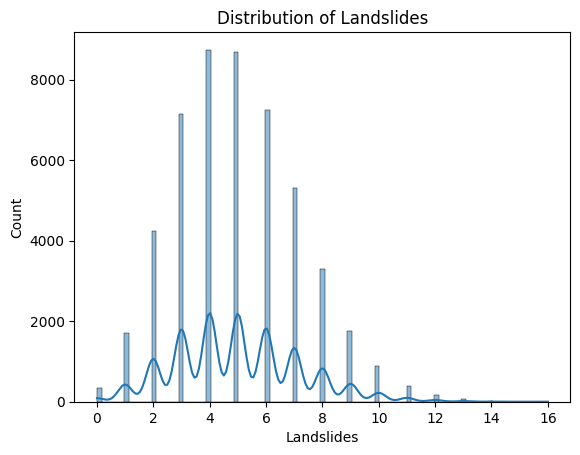

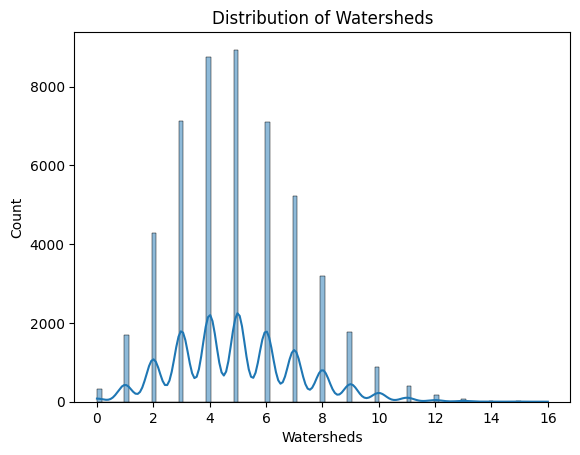

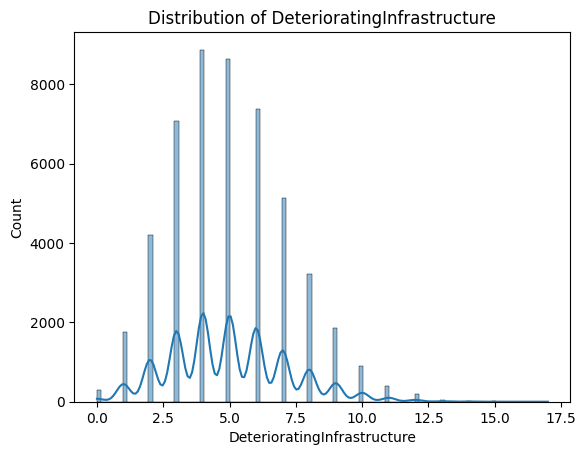

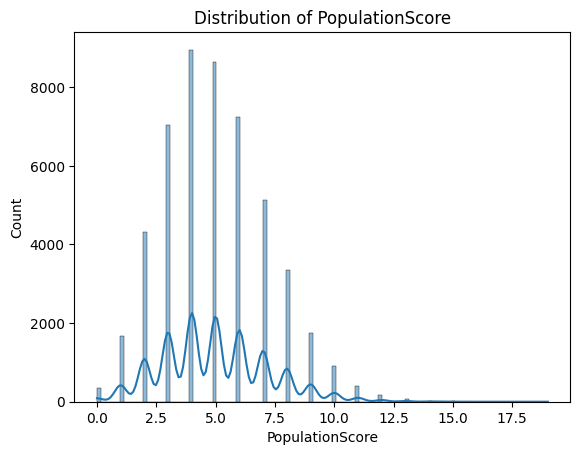

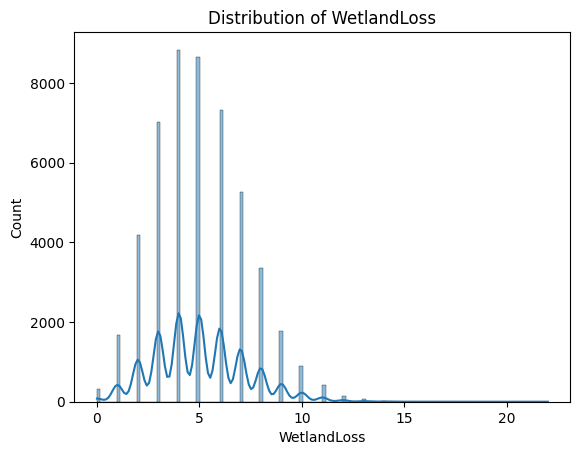

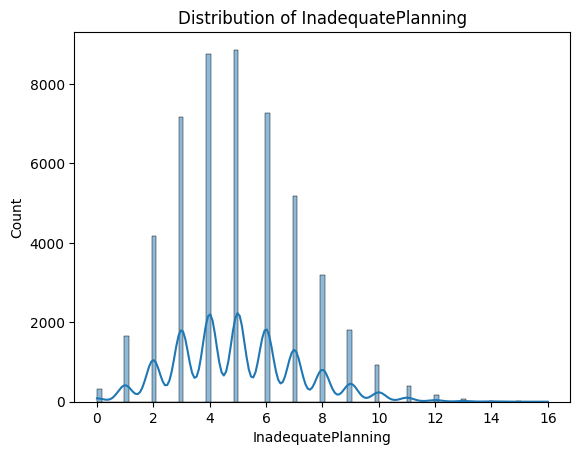

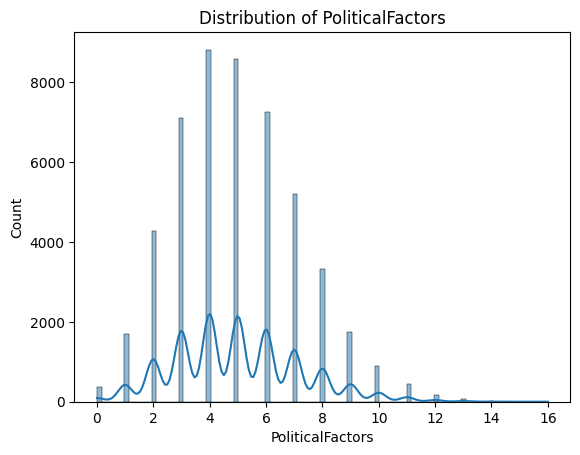

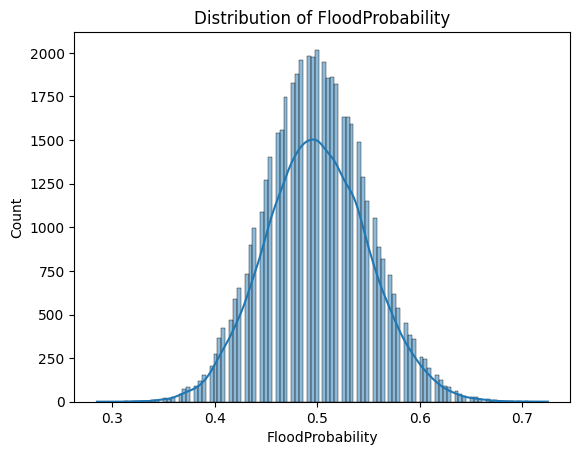

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a distribution plot for each feature
for feature in df.columns:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


# Function to loads and prepare the data

In [17]:
def load_and_prepare_data(data_path):
    # Load the dataset
    df = pd.read_csv(data_path)

    # Define features (X) and target (y)
    features = [
        'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation',
        'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices',
        'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems',
        'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure',
        'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors'
    ]

    X = df[features].values  # Features
    y = df['FloodProbability'].values  # Target variable

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test


**Defining Cost fucntion**

In [18]:
def cost_function(X, y, w):
  """
  Calculate Mean Square Error
  """
  m = len(y)
  Y_pred = np.dot(X, w)
  cost = (1/(2*m)) * np.sum((Y_pred - y) ** 2) #using Mean Square Error (MSE) as cost function
  return cost

#testing cost function
X_test =np.array([[1,2],[3,4],[5,6]])
Y_test =np.array([3,7,11])
W_test =np.array([1,1])
cost= cost_function(X_test,Y_test,W_test)
if cost==0:
  print("Proceed Further")
else:
  print("something went wrong:Reimplement a cost function")
print("Cost function output:",cost_function(X_test,Y_test,W_test))

Proceed Further
Cost function output: 0.0


**Defining gradient descent function**

In [19]:
def gradient_descent(X, y, w, alpha, iterations):
  """
  Perform gradient descent to optimize parameters
  """
  m = len(y)
  cost_history = np.zeros(iterations)
  w_history = np.zeros((iterations, len(w)))

  for i in range(iterations):
      Y_pred = np.dot(X, w)
      loss = Y_pred - y
      # Calculate gradients
      gradients = (1/m) * np.dot(X.T, loss)

      # Update weights
      w = w - alpha * gradients

      # Store weights and cost
      cost_history[i] = cost_function(X, y, w)
      w_history[i] = w

  return w, cost_history, w_history

Defining RMSE And R2 Scroe

In [20]:
def rmse(y, y_pred):
    """
    Calculate Root Mean Square Error
    """
    return np.sqrt(np.mean((y - y_pred) ** 2))

def r2_score(y, y_pred):
    """
    Calculate R-squared score
    """
    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    return 1 - (ss_res / ss_tot)

In [21]:
def main():

  X_train, X_test, y_train, y_test = load_and_prepare_data('/content/drive/MyDrive/Course Work Dataset/flood.csv')

  # Initialize parameters
  w = np.zeros(X_train.shape[1])
  alpha = 0.0001
  iterations = 1000

  # Train the model
  w_optimal, cost_history, w_history = gradient_descent(X_train, y_train, w, alpha, iterations)

  # Make predictions
  y_pred_test = np.dot(X_test, w_optimal)
  y_pred_train = np.dot(X_train, w_optimal)

  model_rmse = rmse(y_test, y_pred_test)
  model_r2 = r2_score(y_test, y_pred_test)

  model_rmse_train = rmse(y_train, y_pred_train)
  model_r2_train = r2_score(y_train, y_pred_train)

  print(f"Final Weights:\n {w_optimal}")
  print(f"\nRMSE: {model_rmse}")
  print(f"\nR-squared: {model_r2}")
  print(f"\nRMSE (Train): {model_rmse_train}")
  print(f"\nR-squared (Train): {model_r2_train}")

if __name__ == "__main__":
    main()

Final Weights:
 [0.00499398 0.0049989  0.0050072  0.00500599 0.00499522 0.00499616
 0.00500929 0.00499076 0.00500922 0.00500453 0.00500385 0.00501025
 0.00499908 0.00499522 0.00498727 0.00499509 0.00499274 0.00500285
 0.00499892 0.00500321]

RMSE: 6.555250818285307e-05

R-squared: 0.9999982746503148

RMSE (Train): 6.493023494734798e-05

R-squared (Train): 0.9999983179932693


**The model performs excellently with an RMSE of 0.0000655 and an R-squared of 0.999998, both for the test and training data. This suggests it predicts very accurately without overfitting**

# Building Model Using Sklearn library

In [22]:
data = pd.read_csv('/content/drive/MyDrive/Course Work Dataset/flood.csv')
df = pd.DataFrame(data)
df.head()

# Define features (X) and target (y)
features = [
        'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation',
        'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices',
        'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems',
        'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure',
        'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors'
]

X = df[features].values  # Features
y = df['FloodProbability'].values  # Target variable

# Split dataset into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features (important for models like Linear Regression & Neural Networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Intializing for the linear regression model

In [23]:
# Initialize and train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Intializing for the random forest model

In [24]:
# Initialize and train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Function for evaluating the model

In [25]:
def evaluate_model(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R-squared: {r2:.4f}")

# Evaluate both models
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)


Linear Regression Performance:
MAE: 0.0000
RMSE: 0.0000
R-squared: 1.0000

Random Forest Performance:
MAE: 0.0205
RMSE: 0.0259
R-squared: 0.7305


**Based on the evelautaion The Random Forest model performs worse than Linear Regression, with higher MAE (0.0205) and RMSE (0.0259), indicating less accurate predictions. The R-squared of 0.7305 shows that it explains only 73% of the variance, leaving room for improvement in performance.**

# Performing Hyper-parameter Optimizations with Cross Validations for both the Models.

In [26]:
# For Linear Regression
# Using valid parameters for newer scikit-learn versions
lr_params = {
    'fit_intercept': [True, False],
    'positive': [True, False]  # Constraint coefficients to be positive
}

lr_grid = GridSearchCV(
    LinearRegression(),
    lr_params,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
lr_grid.fit(X_train, y_train)

print("\nBest Linear Regression Parameters:")
print(lr_grid.best_params_)
print("Best Cross-Validation Score:", np.sqrt(-lr_grid.best_score_))



Best Linear Regression Parameters:
{'fit_intercept': True, 'positive': False}
Best Cross-Validation Score: 7.67791667588025e-17


**The Linear Regression model is set to fit an intercept, and it allows both positive and negative coefficients. The best cross-validation score is extremely low (close to zero), indicating that the model's performance on cross-validation is nearly perfect or that there's negligible error in predictions.**

In [27]:
rf_params = {
    'n_estimators': [30, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params,
    n_iter=10,  # Try only 10 random combinations
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)
rf_random.fit(X_train, y_train)

print("\nBest Random Forest Parameters:")
print(rf_random.best_params_)
print("Best Cross-Validation Score:", np.sqrt(-rf_random.best_score_))



Best Random Forest Parameters:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Best Cross-Validation Score: 0.02642562892538993


**The best Random Forest model uses 100 estimators, with a minimum of 2 samples required to split nodes, 1 sample for leaf nodes, and a maximum depth of 30. The best cross-validation score is 0.0264, indicating a moderate performance with some room for improvement.**

# Best Feature Selection for the Model

In [28]:

X_train = pd.DataFrame(X_train, columns = features) # Using 'features' for column names
X_test = pd.DataFrame(X_test, columns =features) # Using 'features' for column names

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create DataFrame to view the importance of each feature
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances from Random Forest:")
print(importances_df)

# Select the top features (say, top 5 important features)
top_features_rf = importances_df['Feature'].head(5).values


Feature Importances from Random Forest:
                            Feature  Importance
1                TopographyDrainage    0.053020
6                       DamsQuality    0.052789
19                 PoliticalFactors    0.052384
10  IneffectiveDisasterPreparedness    0.051635
16                  PopulationScore    0.051615
2                   RiverManagement    0.051396
13                       Landslides    0.050995
8             AgriculturalPractices    0.050673
15      DeterioratingInfrastructure    0.050642
14                       Watersheds    0.050545
7                         Siltation    0.050332
3                     Deforestation    0.049624
17                      WetlandLoss    0.049293
4                      Urbanization    0.049058
0                  MonsoonIntensity    0.048467
11                  DrainageSystems    0.048180
5                     ClimateChange    0.048161
18               InadequatePlanning    0.047599
12             CoastalVulnerability    0.046854

In [29]:
# Best hyperparameters from the grid search
best_lr_params = lr_grid.best_params_

# Initialize Linear Regression with the best parameters
lr_final = LinearRegression(
    fit_intercept=best_lr_params['fit_intercept'],
    positive=best_lr_params['positive']
  )

# Initialize RFE with the Linear Regression model and the number of features to select
rfe_lr = RFE(lr_final, n_features_to_select=5)  # Select top 5 features
rfe_lr.fit(X_train, y_train)

# Get selected features
selected_features_lr = X_train.columns[rfe_lr.support_]
print("Selected Features for Linear Regression:")
print(selected_features_lr)

# Create a new feature set based on the selected features
X_train_selected_lr = X_train[selected_features_lr]
X_test_selected_lr = X_test[selected_features_lr]

Selected Features for Linear Regression:
Index(['TopographyDrainage', 'DamsQuality', 'IneffectiveDisasterPreparedness',
       'DeterioratingInfrastructure', 'PopulationScore'],
      dtype='object')


# Creating Final Model Based on the best selected Feature

In [30]:
# Create a new feature set based on the top features
X_train_selected_rf = X_train[top_features_rf]
X_test_selected_rf = X_test[top_features_rf]

# Re-train the model using only the selected features
rf_model_selected = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_selected.fit(X_train_selected_rf, y_train)

# Predictions
y_pred_rf_selected = rf_model_selected.predict(X_test_selected_rf)

# Evaluate Model Performance
rmse_rf_selected = np.sqrt(mean_squared_error(y_test, y_pred_rf_selected))
print(f"RMSE for Model with Selected Features (Random Forest): {rmse_rf_selected}")

RMSE for Model with Selected Features (Random Forest): 0.04878717663151183


**An RMSE of 0.0488 for the Random Forest model with selected features suggests that the model's predictions have some error, but it's not too high. While it's better than larger RMSE values, it still indicates room for improvement. The performance is decent, but the model could potentially be fine-tuned further to reduce the error.**

In [31]:
# Re-train the Linear Regression model using only the selected features
lr_final_selected = LinearRegression(fit_intercept=best_lr_params['fit_intercept'],
                                     positive=best_lr_params['positive'])
lr_final_selected.fit(X_train_selected_lr, y_train)

# Predictions
y_pred_lr_selected = lr_final_selected.predict(X_test_selected_lr)

# Evaluate Model Performance
rmse_lr_selected = np.sqrt(mean_squared_error(y_test, y_pred_lr_selected))
print(f"RMSE for Model with Selected Features (Linear Regression): {rmse_lr_selected}")

RMSE for Model with Selected Features (Linear Regression): 0.04309098677313934


**An RMSE of 0.0431 for the Linear Regression model with selected features indicates that the model's predictions are fairly accurate, with relatively low error. While not perfect, it shows good performance and suggests the model is doing well. There's still a bit of room for improvement, but overall, it's a solid result.**

**The Linear Regression model performed slightly better, with a lower RMSE of 0.0431 compared to the Random Forest model's RMSE of 0.0488. This means the Linear Regression model made more accurate predictions with less error.**